In [1]:
import numpy as np 
import pandas as pd 
import os
print(os.listdir("./input"))
print(os.listdir("./input/train"))

# Any results you write to the current directory are saved as output.

['.DS_Store', 'demo.csv', 'test.csv', 'test_ans.csv', 'train', 'valid.csv']
['banana.csv', 'bandage.csv', 'bear.csv', 'bed.csv', 'bee.csv', 'belt.csv', 'cactus.csv', 'cake.csv', 'coffee cup.csv', 'door.csv', 'fork.csv', 'giraffe.csv', 'hand.csv', 'key.csv', 'laptop.csv', 'light bulb.csv', 'marker.csv', 'paintbrush.csv', 'popsicle.csv', 'raccoon.csv', 'rain.csv', 'roller coaster.csv', 'snail.csv', 'spoon.csv', 'swan.csv', 'The Great Wall of China.csv', 'toaster.csv', 'train.csv', 'whale.csv', 'wine bottle.csv']


In [2]:
import warnings
warnings.filterwarnings('ignore') # to suppress some matplotlib deprecation warnings

import ast
import math

import matplotlib.pyplot as plt
import matplotlib.style as style

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [3]:
data = pd.read_csv('./input/train/roller coaster.csv',
                   index_col=0,
                   nrows=5)
data.head()

,drawing,word
0,"[[[0, 28, 50, 73, 88, 94, 101, 101, 98, 100, 1...",roller coaster
1,"[[[0, 50, 78, 126, 142, 152, 157, 157, 141, 12...",roller coaster
2,"[[[2, 0, 17, 42, 68, 97, 120, 140, 151, 151, 1...",roller coaster
3,"[[[192, 130, 101, 72, 0], [4, 99, 132, 148, 17...",roller coaster
4,"[[[9, 11, 19, 41, 114, 136, 153, 167, 179, 230...",roller coaster


In [4]:
data['word'] = data['word'].replace(' ', '_', regex=True)
data.head()

,drawing,word
0,"[[[0, 28, 50, 73, 88, 94, 101, 101, 98, 100, 1...",roller_coaster
1,"[[[0, 50, 78, 126, 142, 152, 157, 157, 141, 12...",roller_coaster
2,"[[[2, 0, 17, 42, 68, 97, 120, 140, 151, 151, 1...",roller_coaster
3,"[[[192, 130, 101, 72, 0], [4, 99, 132, 148, 17...",roller_coaster
4,"[[[9, 11, 19, 41, 114, 136, 153, 167, 179, 230...",roller_coaster


In [5]:
test_raw = pd.read_csv('./input/demo.csv')
first_ids = test_raw.iloc[:5].index
images = [ast.literal_eval(lst) for lst in test_raw.loc[first_ids, 'drawing'].values]
#print(images)

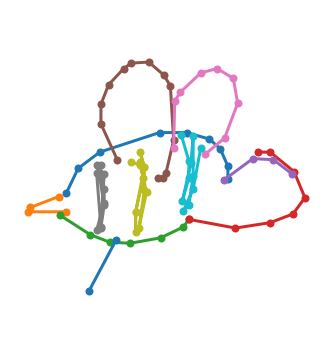

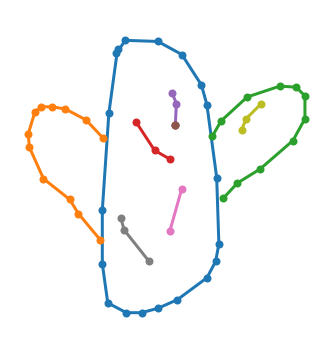

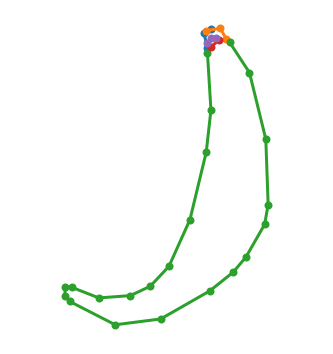

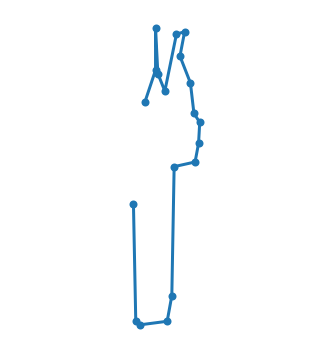

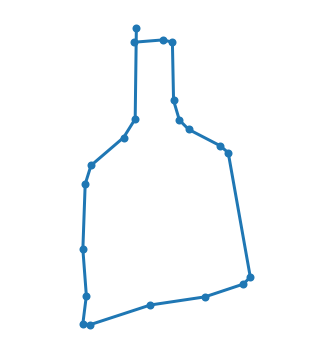

In [6]:
for index, drawing in enumerate(images, 0):#從0開始
    
    plt.figure(figsize=(6,3))
    for x,y in drawing:#直接解開2層array
        #print(x,y)
        #print(drawing)
        plt.subplot(1,2,1)
        plt.plot(x, y, marker='.')
        plt.axis('off')

    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.show()  

In [7]:
import os
#  revise for mac os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
from glob import glob
import re
import ast
import numpy as np 
import pandas as pd
from PIL import Image, ImageDraw 
from tqdm import tqdm
from dask import bag

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.metrics import top_k_categorical_accuracy
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [8]:
class_paths = glob('./input/train/*.csv')
numstonames = {i: v[14:-4].replace(" ", "_") for i, v in enumerate(class_paths)}
print(numstonames)
namestonums = {v:k for k,v in numstonames.items()}

num_classes = 30 ###################
imheight, imwidth = 32, 32  ####################################
ims_per_class =  2000 ##################

def draw_it(strokes):
    image = Image.new("P", (256,256), color=255)
    image_draw = ImageDraw.Draw(image)
    for stroke in ast.literal_eval(strokes):
        for i in range(len(stroke[0])-1):
            image_draw.line([stroke[0][i], 
                             stroke[1][i],
                             stroke[0][i+1], 
                             stroke[1][i+1]],
                            fill=0, width=5)##########################################
    image = image.resize((imheight, imwidth))
    return (np.array(image)-127.5)/127.5


{0: 'banana', 1: 'bandage', 2: 'bear', 3: 'bed', 4: 'bee', 5: 'belt', 6: 'cactus', 7: 'cake', 8: 'coffee_cup', 9: 'door', 10: 'fork', 11: 'giraffe', 12: 'hand', 13: 'key', 14: 'laptop', 15: 'light_bulb', 16: 'marker', 17: 'paintbrush', 18: 'popsicle', 19: 'raccoon', 20: 'rain', 21: 'roller_coaster', 22: 'snail', 23: 'spoon', 24: 'swan', 25: 'The_Great_Wall_of_China', 26: 'toaster', 27: 'train', 28: 'whale', 29: 'wine_bottle'}


In [9]:
train_grand = []

for i,c in enumerate(tqdm(class_paths[0: num_classes])):
    train = pd.read_csv(c, nrows=ims_per_class)
    #print(train)
    #print(train.drawing)
    #print(train.drawing.values)
    imagebag = bag.from_sequence(train.drawing.values).map(draw_it) 
    #print(imagebag)
    trainarray = np.array(imagebag.compute())
    print(trainarray.shape)
    print("------------------------------------")
    trainarray = np.reshape(trainarray, (ims_per_class, -1))#幾個參數就代表幾維的array
    print(trainarray.shape)
    print(trainarray)
    print("------------------------------------")
    labelarray = np.full((train.shape[0], 1), i)
    print(train.shape)
    print(train.shape[0])
    print(labelarray)
    print("------------------------------------")
    trainarray = np.concatenate((labelarray, trainarray), axis=1)
    #print(trainarray.shape)
    print(trainarray)
    print("------------------------------------")
    train_grand.append(trainarray)
    print(train_grand)
    print("------------------------------------")

del trainarray
del train

#less memory than np.concatenate
train_grand = np.array([train_grand.pop() for i in np.arange(num_classes)])#類似於range
print(train_grand)
print("------------------------------------")
train_grand = train_grand.reshape((-1, (imheight*imwidth+1)))
print(train_grand)
print("------------------------------------")



  0%|          | 0/30 [00:00<?, ?it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[-1. -1. -1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [-1. -1.  1. ...  1.  1.  1.]
 ...
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]]
------------------------------------
(2000, 3)
2000
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
------------------------------------
[[ 0. -1. -1. ...  1.  1.  1.]
 [ 0.  1.  1. ...  1.  1.  1.]
 [ 0. -1. -1. ...  1.  1.  1.]
 ...
 [ 0.  1.  1. ...  1.  1.  1.]
 [ 0.  1.  1. ...  1.  1.  1.]
 [ 0.  1.  1. ...  1.  1.  1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]])]
------------------------------------


  3%|▎         | 1/30 [00:00<00:23,  1.22it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1. -1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 ...
 [ 1. -1. -1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]]
------------------------------------
(2000, 3)
2000
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
------------------------------------
[[ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 ...
 [ 1.  1. -1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1.,

  7%|▋         | 2/30 [00:01<00:23,  1.20it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
------------------------------------
(2000, 3)
2000
[[2]
 [2]
 [2]
 ...
 [2]
 [2]
 [2]]
------------------------------------
[[2. 1. 1. ... 1. 1. 1.]
 [2. 1. 1. ... 1. 1. 1.]
 [2. 1. 1. ... 1. 1. 1.]
 ...
 [2. 1. 1. ... 1. 1. 1.]
 [2. 1. 1. ... 1. 1. 1.]
 [2. 1. 1. ... 1. 1. 1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [ 1.,  1., -1., ...,  1.,  1., 

 10%|█         | 3/30 [00:02<00:23,  1.16it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[ 1. -1. -1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1. -1. -1. ...  1.  1.  1.]
 ...
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]]
------------------------------------
(2000, 3)
2000
[[3]
 [3]
 [3]
 ...
 [3]
 [3]
 [3]]
------------------------------------
[[ 3.  1. -1. ...  1.  1.  1.]
 [ 3.  1.  1. ...  1.  1.  1.]
 [ 3.  1. -1. ...  1.  1.  1.]
 ...
 [ 3.  1.  1. ...  1.  1.  1.]
 [ 3.  1.  1. ...  1.  1.  1.]
 [ 3.  1.  1. ...  1.  1.  1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1.,

 13%|█▎        | 4/30 [00:03<00:22,  1.15it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
------------------------------------
(2000, 3)
2000
[[4]
 [4]
 [4]
 ...
 [4]
 [4]
 [4]]
------------------------------------
[[4. 1. 1. ... 1. 1. 1.]
 [4. 1. 1. ... 1. 1. 1.]
 [4. 1. 1. ... 1. 1. 1.]
 ...
 [4. 1. 1. ... 1. 1. 1.]
 [4. 1. 1. ... 1. 1. 1.]
 [4. 1. 1. ... 1. 1. 1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [ 1.,  1., -1., ...,  1.,  1., 

 17%|█▋        | 5/30 [00:04<00:21,  1.16it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[ 1.  1.  1. ...  1.  1.  1.]
 [-1. -1. -1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 ...
 [-1. -1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]]
------------------------------------
(2000, 3)
2000
[[5]
 [5]
 [5]
 ...
 [5]
 [5]
 [5]]
------------------------------------
[[ 5.  1.  1. ...  1.  1.  1.]
 [ 5. -1. -1. ...  1.  1.  1.]
 [ 5.  1.  1. ...  1.  1.  1.]
 ...
 [ 5. -1. -1. ...  1.  1.  1.]
 [ 5.  1.  1. ...  1.  1.  1.]
 [ 5.  1.  1. ...  1.  1.  1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1.,

 20%|██        | 6/30 [00:05<00:20,  1.16it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
------------------------------------
(2000, 3)
2000
[[6]
 [6]
 [6]
 ...
 [6]
 [6]
 [6]]
------------------------------------
[[6. 1. 1. ... 1. 1. 1.]
 [6. 1. 1. ... 1. 1. 1.]
 [6. 1. 1. ... 1. 1. 1.]
 ...
 [6. 1. 1. ... 1. 1. 1.]
 [6. 1. 1. ... 1. 1. 1.]
 [6. 1. 1. ... 1. 1. 1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [ 1.,  1., -1., ...,  1.,  1., 

 23%|██▎       | 7/30 [00:06<00:19,  1.15it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
------------------------------------
(2000, 3)
2000
[[7]
 [7]
 [7]
 ...
 [7]
 [7]
 [7]]
------------------------------------
[[7. 1. 1. ... 1. 1. 1.]
 [7. 1. 1. ... 1. 1. 1.]
 [7. 1. 1. ... 1. 1. 1.]
 ...
 [7. 1. 1. ... 1. 1. 1.]
 [7. 1. 1. ... 1. 1. 1.]
 [7. 1. 1. ... 1. 1. 1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [ 1.,  1., -1., ...,  1.,  1., 

 27%|██▋       | 8/30 [00:06<00:19,  1.14it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
------------------------------------
(2000, 3)
2000
[[8]
 [8]
 [8]
 ...
 [8]
 [8]
 [8]]
------------------------------------
[[8. 1. 1. ... 1. 1. 1.]
 [8. 1. 1. ... 1. 1. 1.]
 [8. 1. 1. ... 1. 1. 1.]
 ...
 [8. 1. 1. ... 1. 1. 1.]
 [8. 1. 1. ... 1. 1. 1.]
 [8. 1. 1. ... 1. 1. 1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [ 1.,  1., -1., ...,  1.,  1., 

 30%|███       | 9/30 [00:07<00:18,  1.15it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 ...
 [ 1.  1.  1. ...  1.  1.  1.]
 [-1. -1. -1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]]
------------------------------------
(2000, 3)
2000
[[9]
 [9]
 [9]
 ...
 [9]
 [9]
 [9]]
------------------------------------
[[ 9.  1.  1. ...  1.  1.  1.]
 [ 9.  1.  1. ...  1.  1.  1.]
 [ 9.  1.  1. ...  1.  1.  1.]
 ...
 [ 9.  1.  1. ...  1.  1.  1.]
 [ 9. -1. -1. ...  1.  1.  1.]
 [ 9.  1.  1. ...  1.  1.  1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1.,

 33%|███▎      | 10/30 [00:08<00:17,  1.12it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[ 1.  1. -1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [-1.  1.  1. ...  1.  1.  1.]
 ...
 [ 1. -1.  1. ...  1.  1.  1.]
 [-1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]]
------------------------------------
(2000, 3)
2000
[[10]
 [10]
 [10]
 ...
 [10]
 [10]
 [10]]
------------------------------------
[[10.  1.  1. ...  1.  1.  1.]
 [10.  1.  1. ...  1.  1.  1.]
 [10. -1.  1. ...  1.  1.  1.]
 ...
 [10.  1. -1. ...  1.  1.  1.]
 [10. -1.  1. ...  1.  1.  1.]
 [10.  1.  1. ...  1.  1.  1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.

 37%|███▋      | 11/30 [00:09<00:16,  1.15it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[ 1.  1.  1. ...  1.  1.  1.]
 [ 1. -1. -1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 ...
 [-1. -1. -1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]]
------------------------------------
(2000, 3)
2000
[[11]
 [11]
 [11]
 ...
 [11]
 [11]
 [11]]
------------------------------------
[[11.  1.  1. ...  1.  1.  1.]
 [11.  1. -1. ...  1.  1.  1.]
 [11.  1.  1. ...  1.  1.  1.]
 ...
 [11. -1. -1. ...  1.  1.  1.]
 [11.  1.  1. ...  1.  1.  1.]
 [11.  1.  1. ...  1.  1.  1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.

 40%|████      | 12/30 [00:10<00:15,  1.14it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
------------------------------------
(2000, 3)
2000
[[12]
 [12]
 [12]
 ...
 [12]
 [12]
 [12]]
------------------------------------
[[12.  1.  1. ...  1.  1.  1.]
 [12.  1.  1. ...  1.  1.  1.]
 [12.  1.  1. ...  1.  1.  1.]
 ...
 [12.  1.  1. ...  1.  1.  1.]
 [12.  1.  1. ...  1.  1.  1.]
 [12.  1.  1. ...  1.  1.  1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       .

 43%|████▎     | 13/30 [00:11<00:14,  1.14it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 ...
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1. -1. ...  1.  1.  1.]
 [-1. -1. -1. ...  1.  1.  1.]]
------------------------------------
(2000, 3)
2000
[[13]
 [13]
 [13]
 ...
 [13]
 [13]
 [13]]
------------------------------------
[[13.  1.  1. ...  1.  1.  1.]
 [13.  1.  1. ...  1.  1.  1.]
 [13.  1.  1. ...  1.  1.  1.]
 ...
 [13.  1.  1. ...  1.  1.  1.]
 [13.  1.  1. ...  1.  1.  1.]
 [13. -1. -1. ...  1.  1.  1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.

 47%|████▋     | 14/30 [00:12<00:14,  1.14it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[ 1.  1.  1. ...  1.  1.  1.]
 [-1. -1. -1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 ...
 [-1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [-1. -1. -1. ...  1.  1.  1.]]
------------------------------------
(2000, 3)
2000
[[14]
 [14]
 [14]
 ...
 [14]
 [14]
 [14]]
------------------------------------
[[14.  1.  1. ...  1.  1.  1.]
 [14. -1. -1. ...  1.  1.  1.]
 [14.  1.  1. ...  1.  1.  1.]
 ...
 [14. -1.  1. ...  1.  1.  1.]
 [14.  1.  1. ...  1.  1.  1.]
 [14. -1. -1. ...  1.  1.  1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.

 50%|█████     | 15/30 [00:13<00:13,  1.13it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
------------------------------------
(2000, 3)
2000
[[15]
 [15]
 [15]
 ...
 [15]
 [15]
 [15]]
------------------------------------
[[15.  1.  1. ...  1.  1.  1.]
 [15.  1.  1. ...  1.  1.  1.]
 [15.  1.  1. ...  1.  1.  1.]
 ...
 [15.  1.  1. ...  1.  1.  1.]
 [15.  1.  1. ...  1.  1.  1.]
 [15.  1.  1. ...  1.  1.  1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       .

 53%|█████▎    | 16/30 [00:14<00:12,  1.14it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[ 1.  1.  1. ...  1.  1.  1.]
 [-1.  1. -1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 ...
 [ 1. -1. -1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1. -1. -1. ... -1.  1.  1.]]
------------------------------------
(2000, 3)
2000
[[16]
 [16]
 [16]
 ...
 [16]
 [16]
 [16]]
------------------------------------
[[16.  1.  1. ...  1.  1.  1.]
 [16. -1.  1. ...  1.  1.  1.]
 [16.  1.  1. ...  1.  1.  1.]
 ...
 [16.  1. -1. ...  1.  1.  1.]
 [16.  1.  1. ...  1.  1.  1.]
 [16.  1. -1. ... -1.  1.  1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.

 57%|█████▋    | 17/30 [00:14<00:11,  1.14it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 ...
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1. -1. ...  1.  1.  1.]]
------------------------------------
(2000, 3)
2000
[[17]
 [17]
 [17]
 ...
 [17]
 [17]
 [17]]
------------------------------------
[[17.  1.  1. ...  1.  1.  1.]
 [17.  1.  1. ...  1.  1.  1.]
 [17.  1.  1. ...  1.  1.  1.]
 ...
 [17.  1.  1. ...  1.  1.  1.]
 [17.  1.  1. ...  1.  1.  1.]
 [17.  1.  1. ...  1.  1.  1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.

 60%|██████    | 18/30 [00:15<00:10,  1.15it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[ 1.  1.  1. ...  1.  1.  1.]
 [ 1. -1. -1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 ...
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]]
------------------------------------
(2000, 3)
2000
[[18]
 [18]
 [18]
 ...
 [18]
 [18]
 [18]]
------------------------------------
[[18.  1.  1. ...  1.  1.  1.]
 [18.  1. -1. ...  1.  1.  1.]
 [18.  1.  1. ...  1.  1.  1.]
 ...
 [18.  1.  1. ...  1.  1.  1.]
 [18.  1.  1. ...  1.  1.  1.]
 [18.  1.  1. ...  1.  1.  1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.

 63%|██████▎   | 19/30 [00:16<00:09,  1.12it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [-1. -1. -1. ...  1.  1.  1.]
 ...
 [-1. -1. -1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [-1. -1. -1. ...  1.  1.  1.]]
------------------------------------
(2000, 3)
2000
[[19]
 [19]
 [19]
 ...
 [19]
 [19]
 [19]]
------------------------------------
[[19.  1.  1. ...  1.  1.  1.]
 [19.  1.  1. ...  1.  1.  1.]
 [19. -1. -1. ...  1.  1.  1.]
 ...
 [19. -1. -1. ...  1.  1.  1.]
 [19.  1.  1. ...  1.  1.  1.]
 [19. -1. -1. ...  1.  1.  1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.

 67%|██████▋   | 20/30 [00:17<00:09,  1.09it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 ...
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [-1.  1.  1. ...  1.  1.  1.]]
------------------------------------
(2000, 3)
2000
[[20]
 [20]
 [20]
 ...
 [20]
 [20]
 [20]]
------------------------------------
[[20.  1.  1. ...  1.  1.  1.]
 [20.  1.  1. ...  1.  1.  1.]
 [20.  1.  1. ...  1.  1.  1.]
 ...
 [20.  1.  1. ...  1.  1.  1.]
 [20.  1.  1. ...  1.  1.  1.]
 [20. -1.  1. ...  1.  1.  1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.

 70%|███████   | 21/30 [00:18<00:08,  1.11it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 ...
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1. -1. -1. ...  1.  1.  1.]
 [-1. -1.  1. ...  1.  1.  1.]]
------------------------------------
(2000, 3)
2000
[[21]
 [21]
 [21]
 ...
 [21]
 [21]
 [21]]
------------------------------------
[[21.  1.  1. ...  1.  1.  1.]
 [21.  1.  1. ...  1.  1.  1.]
 [21.  1.  1. ...  1.  1.  1.]
 ...
 [21.  1.  1. ...  1.  1.  1.]
 [21.  1. -1. ...  1.  1.  1.]
 [21. -1. -1. ...  1.  1.  1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.

 73%|███████▎  | 22/30 [00:19<00:07,  1.13it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
------------------------------------
(2000, 3)
2000
[[22]
 [22]
 [22]
 ...
 [22]
 [22]
 [22]]
------------------------------------
[[22.  1.  1. ...  1.  1.  1.]
 [22.  1.  1. ...  1.  1.  1.]
 [22.  1.  1. ...  1.  1.  1.]
 ...
 [22.  1.  1. ...  1.  1.  1.]
 [22.  1.  1. ...  1.  1.  1.]
 [22.  1.  1. ...  1.  1.  1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       .

 77%|███████▋  | 23/30 [00:20<00:06,  1.12it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [-1. -1. -1. ...  1.  1.  1.]
 ...
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1. -1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]]
------------------------------------
(2000, 3)
2000
[[23]
 [23]
 [23]
 ...
 [23]
 [23]
 [23]]
------------------------------------
[[23.  1.  1. ...  1.  1.  1.]
 [23.  1.  1. ...  1.  1.  1.]
 [23. -1. -1. ...  1.  1.  1.]
 ...
 [23.  1.  1. ...  1.  1.  1.]
 [23.  1.  1. ...  1.  1.  1.]
 [23.  1.  1. ...  1.  1.  1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.

 80%|████████  | 24/30 [00:21<00:05,  1.14it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[ 1.  1. -1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 ...
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1. -1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]]
------------------------------------
(2000, 3)
2000
[[24]
 [24]
 [24]
 ...
 [24]
 [24]
 [24]]
------------------------------------
[[24.  1.  1. ...  1.  1.  1.]
 [24.  1.  1. ...  1.  1.  1.]
 [24.  1.  1. ...  1.  1.  1.]
 ...
 [24.  1.  1. ...  1.  1.  1.]
 [24.  1.  1. ...  1.  1.  1.]
 [24.  1.  1. ...  1.  1.  1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.

 83%|████████▎ | 25/30 [00:21<00:04,  1.16it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 ...
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1. -1. -1. ...  1.  1.  1.]
 [-1. -1.  1. ...  1.  1.  1.]]
------------------------------------
(2000, 3)
2000
[[25]
 [25]
 [25]
 ...
 [25]
 [25]
 [25]]
------------------------------------
[[25.  1.  1. ...  1.  1.  1.]
 [25.  1.  1. ...  1.  1.  1.]
 [25.  1.  1. ...  1.  1.  1.]
 ...
 [25.  1.  1. ...  1.  1.  1.]
 [25.  1. -1. ...  1.  1.  1.]
 [25. -1. -1. ...  1.  1.  1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.

 87%|████████▋ | 26/30 [00:22<00:03,  1.17it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
------------------------------------
(2000, 3)
2000
[[26]
 [26]
 [26]
 ...
 [26]
 [26]
 [26]]
------------------------------------
[[26.  1.  1. ...  1.  1.  1.]
 [26.  1.  1. ...  1.  1.  1.]
 [26.  1.  1. ...  1.  1.  1.]
 ...
 [26.  1.  1. ...  1.  1.  1.]
 [26.  1.  1. ...  1.  1.  1.]
 [26.  1.  1. ...  1.  1.  1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       .

 90%|█████████ | 27/30 [00:23<00:02,  1.16it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
------------------------------------
(2000, 3)
2000
[[27]
 [27]
 [27]
 ...
 [27]
 [27]
 [27]]
------------------------------------
[[27.  1.  1. ...  1.  1.  1.]
 [27.  1.  1. ...  1.  1.  1.]
 [27.  1.  1. ...  1.  1.  1.]
 ...
 [27.  1.  1. ...  1.  1.  1.]
 [27.  1.  1. ...  1.  1.  1.]
 [27.  1.  1. ...  1.  1.  1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       .

------------------------------------


 93%|█████████▎| 28/30 [00:24<00:01,  1.14it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 ...
 [ 1.  1.  1. ...  1.  1.  1.]
 [-1. -1. -1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]]
------------------------------------
(2000, 3)
2000
[[28]
 [28]
 [28]
 ...
 [28]
 [28]
 [28]]
------------------------------------
[[28.  1.  1. ...  1.  1.  1.]
 [28.  1.  1. ...  1.  1.  1.]
 [28.  1.  1. ...  1.  1.  1.]
 ...
 [28.  1.  1. ...  1.  1.  1.]
 [28. -1. -1. ...  1.  1.  1.]
 [28.  1.  1. ...  1.  1.  1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.

       [28.,  1.,  1., ...,  1.,  1.,  1.]])]
------------------------------------


 97%|█████████▋| 29/30 [00:25<00:00,  1.13it/s]

(2000, 32, 32)
------------------------------------
(2000, 1024)
[[ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 ...
 [ 1. -1. -1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]]
------------------------------------
(2000, 3)
2000
[[29]
 [29]
 [29]
 ...
 [29]
 [29]
 [29]]
------------------------------------
[[29.  1.  1. ...  1.  1.  1.]
 [29.  1.  1. ...  1.  1.  1.]
 [29.  1.  1. ...  1.  1.  1.]
 ...
 [29.  1. -1. ...  1.  1.  1.]
 [29.  1.  1. ...  1.  1.  1.]
 [29.  1.  1. ...  1.  1.  1.]]
------------------------------------
[array([[ 0., -1., -1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.

       [29.,  1.,  1., ...,  1.,  1.,  1.]])]
------------------------------------


100%|██████████| 30/30 [00:26<00:00,  1.14it/s]


[[[29.  1.  1. ...  1.  1.  1.]
  [29.  1.  1. ...  1.  1.  1.]
  [29.  1.  1. ...  1.  1.  1.]
  ...
  [29.  1. -1. ...  1.  1.  1.]
  [29.  1.  1. ...  1.  1.  1.]
  [29.  1.  1. ...  1.  1.  1.]]

 [[28.  1.  1. ...  1.  1.  1.]
  [28.  1.  1. ...  1.  1.  1.]
  [28.  1.  1. ...  1.  1.  1.]
  ...
  [28.  1.  1. ...  1.  1.  1.]
  [28. -1. -1. ...  1.  1.  1.]
  [28.  1.  1. ...  1.  1.  1.]]

 [[27.  1.  1. ...  1.  1.  1.]
  [27.  1.  1. ...  1.  1.  1.]
  [27.  1.  1. ...  1.  1.  1.]
  ...
  [27.  1.  1. ...  1.  1.  1.]
  [27.  1.  1. ...  1.  1.  1.]
  [27.  1.  1. ...  1.  1.  1.]]

 ...

 [[ 2.  1.  1. ...  1.  1.  1.]
  [ 2.  1.  1. ...  1.  1.  1.]
  [ 2.  1.  1. ...  1.  1.  1.]
  ...
  [ 2.  1.  1. ...  1.  1.  1.]
  [ 2.  1.  1. ...  1.  1.  1.]
  [ 2.  1.  1. ...  1.  1.  1.]]

 [[ 1.  1.  1. ...  1.  1.  1.]
  [ 1.  1.  1. ...  1.  1.  1.]
  [ 1.  1.  1. ...  1.  1.  1.]
  ...
  [ 1.  1. -1. ...  1.  1.  1.]
  [ 1.  1.  1. ...  1.  1.  1.]
  [ 1.  1.  1. ...  1.  1.  

In [10]:
# valfrac = 0.1
# cutpt = int(valfrac * train_grand.shape[0])

#np.random.shuffle(train_grand)

y_train, X_train = train_grand[:, 0], train_grand[:, 1:]
print(y_train.shape)
print(y_train)
print("=========================================================")
print(X_train.shape)
print(X_train)
print("=========================================================")
y_train = y_train.reshape(-1, 1)
print(y_train.shape)
print(y_train)
print("=========================================================")
print(X_train.shape)
print(X_train)
print("=========================================================")

#valid = pd.read_csv('./input/valid.csv',nrows = ims_per_class)
#imagebag = bag.from_sequence(valid.drawing.values).map(draw_it)
#validarray = np.array(imagebag.compute())
#print(validarray)
#print("------------------------------------")
#validarray = np.reshape(validarray, (validarray.shape[0], imheight, imwidth, 1))#4維空間  validarray.shape[0]表示最高維的長度
#print(validarray)                                                               #reshape 最後一個參數是1維的長度,倒數第2是2維
#print("------------------------------------")                                   #倒數第3是3維,依此類推
#X_val = validarray
#print(X_val)
#print("------------------------------------")
#y_val = [namestonums[w.replace(" ", "_") ] for w in valid.word]
#print(y_val)
#print("yyyyyyy------------------------------------")
# del train_grand


#y_train = keras.utils.to_categorical(y_train, num_classes)
#print(y_train)
#print("------------------------------------")
X_train = X_train.reshape(X_train.shape[0], imheight, imwidth, 1)
print(X_train.shape)
print(X_train)
print("------------------------------------")
#y_val = keras.utils.to_categorical(y_val, num_classes)
#print(y_val)
#print("------------------------------------")
#X_val = X_val.reshape(X_val.shape[0], imheight, imwidth, 1)
#print(X_val)
#print("------------------------------------")

(60000,)
[29. 29. 29. ...  0.  0.  0.]
(60000, 1024)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
(60000, 1)
[[29.]
 [29.]
 [29.]
 ...
 [ 0.]
 [ 0.]
 [ 0.]]
(60000, 1024)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
(60000, 32, 32, 1)
[[[[ 1.]
   [ 1.]
   [ 1.]
   ...
   [ 1.]
   [ 1.]
   [ 1.]]

  [[ 1.]
   [ 1.]
   [ 1.]
   ...
   [ 1.]
   [ 1.]
   [ 1.]]

  [[ 1.]
   [ 1.]
   [ 1.]
   ...
   [ 1.]
   [ 1.]
   [ 1.]]

  ...

  [[-1.]
   [ 1.]
   [ 1.]
   ...
   [ 1.]
   [ 1.]
   [ 1.]]

  [[-1.]
   [ 1.]
   [ 1.]
   ...
   [ 1.]
   [ 1.]
   [ 1.]]

  [[-1.]
   [-1.]
   [-1.]
   ...
   [ 1.]
   [ 1.]
   [ 1.]]]


 [[[ 1.]
   [ 1.]
   [ 1.]
   ...
   [ 1.]
   [ 1.]
   [ 1.]]

  [[ 1.]
   [ 1.]
   [ 1.]
   ...
   [ 1.]
   [ 1.]
   [ 1.]]

  [[ 1.]
   [ 1.]
   [ 1.]
   

In [12]:
from __future__ import print_function, division

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply
from keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt

import numpy as np

class ACGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 32 ############
        self.img_cols = 32 ############
        self.channels = 1 ############
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.num_classes = 30 #############
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)
        losses = ['binary_crossentropy', 'sparse_categorical_crossentropy']

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss=losses,
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise and the target label as input
        # and generates the corresponding digit of that label
        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,))
        #print(label.shape)
        #print("label=================================================================")
        img = self.generator([noise, label])

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated image as input and determines validity
        # and the label of that image
        valid, target_label = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model([noise, label], [valid, target_label])
        self.combined.compile(loss=losses,
            optimizer=optimizer)

    def build_generator(self):

        model = Sequential()

        model.add(Dense(128 * 8 * 8, activation="relu", input_dim=self.latent_dim)) ############
        model.add(Reshape((8, 8, 128))) ##############
        model.add(BatchNormalization(momentum=0.8))
        model.add(UpSampling2D())
        model.add(Conv2D(128, kernel_size=3, padding="same"))#######################
        model.add(Activation("relu"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size=3, padding="same"))#######################
        model.add(Activation("relu"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Conv2D(self.channels, kernel_size=3, padding='same'))
        model.add(Activation("tanh"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        #print(noise.shape)
        #print("noise=================================================================")
        label = Input(shape=(1,), dtype='int32')
        #print(label.shape)
        #print("label=================================================================")
        label_embedding = Flatten()(Embedding(self.num_classes, self.latent_dim)(label))

        model_input = multiply([noise, label_embedding])
        #print(label_embedding.shape)
        #print("label_embedding=================================================================")
        img = model(model_input)
        #print(img.shape)
        #print("img=================================================================")

        return Model([noise, label], img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Conv2D(16, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(32, kernel_size=3, strides=2, padding="same"))
        model.add(ZeroPadding2D(padding=((0,1),(0,1))))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Conv2D(128, kernel_size=3, strides=1, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))

        model.add(Flatten())
        model.summary()

        img = Input(shape=self.img_shape)

        # Extract feature representation
        features = model(img)

        # Determine validity and label of the image
        validity = Dense(1, activation="sigmoid")(features)
        label = Dense(self.num_classes, activation="softmax")(features)

        return Model(img, [validity, label])

    def train(self, epochs, batch_size=128, sample_interval=50):

        # Load the dataset
        global X_train, y_train
        #(X_train, y_train), (_, _) = mnist.load_data()
        
        print("=================================================================")
        print(X_train.shape)#顛到的，最高維度是60000
        print("=================================================================")
        print(y_train.shape)
        print("=================================================================")
        #print(_)
        #print("=================================================================")
        
        # Configure inputs
        #X_train = (X_train.astype(np.float32) - 127.5) / 127.5
        X_train = X_train.astype(np.float32)
        print(X_train.shape)
        print(X_train)
        print("=================================================================")
        #X_train = np.expand_dims(X_train, axis=3)
        #print(X_train.shape)
        #print(X_train)
        print("=================================================================")
        y_train = y_train.reshape(-1, 1)
        print(y_train.shape)
        print(y_train)
        print("y_train=================================================================")
        
        #for x in tqdm(range(X_train.shape[0])):
         #   for y in range(X_train.shape[1]):
          #      for z in range(X_train.shape[2]):
           #         for m in range(X_train.shape[3]):
            #            X_train[x,y,z,m]=(-X_train[x,y,z,m]) 黑白轉換

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]
           # print(idx.shape)
           # print("idx=================================================================")
            #print(imgs.shape)
            #print("imgs=================================================================")


            # Sample noise as generator input
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
           # print(noise)
           # print("noise=================================================================")

            # The labels of the digits that the generator tries to create an
            # image representation of
            sampled_labels = np.random.randint(0, 30, (batch_size, 1))##############################################
            #print(sampled_labels)
            #print("sampled_labels=================================================================")

            # Generate a half batch of new images
            gen_imgs = self.generator.predict([noise, sampled_labels])
            #print(noise.shape)
            #print("noise=================================================================")
            #print(sampled_labels.shape)
            #print("sampled_labels=================================================================")
            #print(gen_imgs.shape)
            #print("gen_imgs=================================================================")

            # Image labels. 0-29 
            img_labels = y_train[idx]
           # print(img_labels)
           # print("img_labels=================================================================")

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(imgs, [valid, img_labels])
            #print(imgs.shape)
            #print("=================================================================")
            #print(gen_imgs.shape)
            #print("=================================================================")
            #print(fake.shape)
            #print("=================================================================")
            #print(sampled_labels.shape)
            #print("=================================================================")
            #gen_imgs = np.reshape(gen_imgs, (32, 64, 64, 1))
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, [fake, sampled_labels])
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Train the generator
            g_loss = self.combined.train_on_batch([noise, sampled_labels], [valid, sampled_labels])

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%, op_acc: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[3], 100*d_loss[4], g_loss[0]))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.save_model()
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 10, 30 #################
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        #print(noise.shape)
        #print(noise)
        sampled_labels = np.array([num for _ in range(r) for num in range(c)])
        #print(sampled_labels.shape)
        #print(sampled_labels)
        gen_imgs = self.generator.predict([noise, sampled_labels])
        # Rescale images 0 - 1
        #print(gen_imgs)
        print("gen_imgs========================================================")
        gen_imgs = 0.5 * gen_imgs + 0.5
        #print(gen_imgs.shape)

        fig, axs = plt.subplots(r, c, figsize=(64,64))
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt,:,:,0], cmap='gray')
                #print(gen_imgs[cnt,:,:,0])
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("images/%d.png" % epoch)
        plt.close()

    def save_model(self):

        def save(model, model_name):
            model_path = "saved_model/%s.json" % model_name
            weights_path = "saved_model/%s_weights.hdf5" % model_name
            options = {"file_arch": model_path,
                        "file_weight": weights_path}
            json_string = model.to_json()
            open(options['file_arch'], 'w').write(json_string)
            model.save_weights(options['file_weight'])

        save(self.generator, "generator")
        save(self.discriminator, "discriminator")


if __name__ == '__main__':
    acgan = ACGAN()
    acgan.train(epochs=14000, batch_size=1000, sample_interval=200)#######################

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 16, 16, 16)        160       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 9, 9, 32)          0         
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 9, 9, 32)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 9, 9, 32)          0         
__________

11 [D loss: 4.210315, acc.: 61.30%, op_acc: 4.85%] [G loss: 4.544537]
12 [D loss: 4.253601, acc.: 57.60%, op_acc: 4.20%] [G loss: 4.558613]
13 [D loss: 4.314748, acc.: 53.55%, op_acc: 4.30%] [G loss: 4.492177]
14 [D loss: 4.266742, acc.: 56.00%, op_acc: 5.20%] [G loss: 4.491906]
15 [D loss: 4.206640, acc.: 58.90%, op_acc: 5.50%] [G loss: 4.636729]
16 [D loss: 4.161937, acc.: 64.70%, op_acc: 5.65%] [G loss: 4.686381]
17 [D loss: 4.078132, acc.: 71.05%, op_acc: 5.85%] [G loss: 4.610649]
18 [D loss: 4.063761, acc.: 68.05%, op_acc: 5.55%] [G loss: 4.548141]
19 [D loss: 4.065243, acc.: 66.80%, op_acc: 6.00%] [G loss: 4.479593]
20 [D loss: 4.071962, acc.: 68.60%, op_acc: 6.10%] [G loss: 4.440883]
21 [D loss: 4.042038, acc.: 65.85%, op_acc: 7.10%] [G loss: 4.443056]
22 [D loss: 4.098695, acc.: 61.90%, op_acc: 7.00%] [G loss: 4.519885]
23 [D loss: 4.090576, acc.: 61.75%, op_acc: 7.10%] [G loss: 4.572650]
24 [D loss: 4.072778, acc.: 59.05%, op_acc: 7.35%] [G loss: 4.663806]
25 [D loss: 4.131653

126 [D loss: 3.037444, acc.: 74.95%, op_acc: 25.25%] [G loss: 4.055666]
127 [D loss: 2.964972, acc.: 79.70%, op_acc: 23.15%] [G loss: 4.142899]
128 [D loss: 3.023288, acc.: 78.15%, op_acc: 23.60%] [G loss: 3.990943]
129 [D loss: 3.065103, acc.: 72.90%, op_acc: 22.10%] [G loss: 3.907876]
130 [D loss: 3.119019, acc.: 66.95%, op_acc: 22.85%] [G loss: 3.849305]
131 [D loss: 3.236800, acc.: 56.85%, op_acc: 24.90%] [G loss: 3.904645]
132 [D loss: 3.076058, acc.: 75.90%, op_acc: 23.05%] [G loss: 4.262013]
133 [D loss: 3.113214, acc.: 70.80%, op_acc: 21.95%] [G loss: 4.144618]
134 [D loss: 3.100073, acc.: 75.05%, op_acc: 22.60%] [G loss: 3.951637]
135 [D loss: 3.347362, acc.: 57.70%, op_acc: 24.00%] [G loss: 3.707570]
136 [D loss: 3.564789, acc.: 40.55%, op_acc: 24.30%] [G loss: 3.413080]
137 [D loss: 3.538707, acc.: 40.30%, op_acc: 22.15%] [G loss: 3.601614]
138 [D loss: 3.400826, acc.: 45.25%, op_acc: 24.60%] [G loss: 3.618880]
139 [D loss: 3.444313, acc.: 41.95%, op_acc: 23.00%] [G loss: 3.

238 [D loss: 2.363038, acc.: 82.25%, op_acc: 40.35%] [G loss: 3.335388]
239 [D loss: 2.535712, acc.: 80.35%, op_acc: 37.00%] [G loss: 3.631124]
240 [D loss: 3.187067, acc.: 42.30%, op_acc: 37.75%] [G loss: 2.560051]
241 [D loss: 3.070045, acc.: 48.95%, op_acc: 33.15%] [G loss: 3.193269]
242 [D loss: 2.661368, acc.: 66.10%, op_acc: 39.30%] [G loss: 3.316355]
243 [D loss: 2.695572, acc.: 67.15%, op_acc: 38.50%] [G loss: 3.407567]
244 [D loss: 2.722407, acc.: 65.65%, op_acc: 37.25%] [G loss: 3.354202]
245 [D loss: 2.732105, acc.: 59.85%, op_acc: 40.45%] [G loss: 3.060166]
246 [D loss: 2.866683, acc.: 47.05%, op_acc: 42.55%] [G loss: 2.771570]
247 [D loss: 2.842206, acc.: 46.45%, op_acc: 40.90%] [G loss: 2.811228]
248 [D loss: 2.859675, acc.: 50.35%, op_acc: 41.90%] [G loss: 2.875763]
249 [D loss: 2.811991, acc.: 51.20%, op_acc: 42.00%] [G loss: 2.934951]
250 [D loss: 2.678185, acc.: 61.90%, op_acc: 42.85%] [G loss: 3.030004]
251 [D loss: 2.607293, acc.: 66.95%, op_acc: 41.95%] [G loss: 3.

351 [D loss: 2.105511, acc.: 51.55%, op_acc: 65.35%] [G loss: 1.461288]
352 [D loss: 1.971077, acc.: 56.10%, op_acc: 66.45%] [G loss: 1.462221]
353 [D loss: 2.020073, acc.: 54.45%, op_acc: 66.00%] [G loss: 1.399975]
354 [D loss: 2.027511, acc.: 50.50%, op_acc: 66.95%] [G loss: 1.305903]
355 [D loss: 2.095840, acc.: 46.70%, op_acc: 65.70%] [G loss: 1.310761]
356 [D loss: 2.126426, acc.: 47.95%, op_acc: 65.20%] [G loss: 1.329904]
357 [D loss: 2.188055, acc.: 46.30%, op_acc: 64.05%] [G loss: 1.361020]
358 [D loss: 2.079378, acc.: 46.10%, op_acc: 66.80%] [G loss: 1.391020]
359 [D loss: 2.042416, acc.: 51.95%, op_acc: 65.15%] [G loss: 1.492200]
360 [D loss: 2.004996, acc.: 54.85%, op_acc: 65.20%] [G loss: 1.484429]
361 [D loss: 1.932627, acc.: 56.60%, op_acc: 66.85%] [G loss: 1.403052]
362 [D loss: 1.999208, acc.: 53.50%, op_acc: 67.50%] [G loss: 1.333410]
363 [D loss: 1.988478, acc.: 52.75%, op_acc: 68.00%] [G loss: 1.347666]
364 [D loss: 1.973196, acc.: 54.05%, op_acc: 67.25%] [G loss: 1.

463 [D loss: 1.762940, acc.: 63.25%, op_acc: 70.15%] [G loss: 1.328818]
464 [D loss: 1.708896, acc.: 62.60%, op_acc: 71.60%] [G loss: 1.309414]
465 [D loss: 1.769808, acc.: 64.00%, op_acc: 70.25%] [G loss: 1.292171]
466 [D loss: 1.694483, acc.: 59.90%, op_acc: 73.70%] [G loss: 1.226236]
467 [D loss: 1.757434, acc.: 60.35%, op_acc: 71.75%] [G loss: 1.277253]
468 [D loss: 1.702523, acc.: 64.05%, op_acc: 71.80%] [G loss: 1.327280]
469 [D loss: 1.674825, acc.: 67.05%, op_acc: 70.90%] [G loss: 1.331638]
470 [D loss: 1.671095, acc.: 66.85%, op_acc: 72.15%] [G loss: 1.280710]
471 [D loss: 1.701339, acc.: 64.35%, op_acc: 71.95%] [G loss: 1.223115]
472 [D loss: 1.732037, acc.: 58.45%, op_acc: 72.40%] [G loss: 1.200513]
473 [D loss: 1.672102, acc.: 61.00%, op_acc: 73.80%] [G loss: 1.170275]
474 [D loss: 1.772584, acc.: 56.30%, op_acc: 72.05%] [G loss: 1.147892]
475 [D loss: 1.784178, acc.: 55.05%, op_acc: 71.50%] [G loss: 1.147485]
476 [D loss: 1.831209, acc.: 52.50%, op_acc: 71.75%] [G loss: 1.

576 [D loss: 1.669295, acc.: 65.30%, op_acc: 71.45%] [G loss: 1.414988]
577 [D loss: 1.627668, acc.: 64.75%, op_acc: 74.00%] [G loss: 1.396862]
578 [D loss: 1.647843, acc.: 64.40%, op_acc: 72.45%] [G loss: 1.310993]
579 [D loss: 1.665459, acc.: 60.90%, op_acc: 73.95%] [G loss: 1.334614]
580 [D loss: 1.629894, acc.: 62.45%, op_acc: 73.60%] [G loss: 1.304787]
581 [D loss: 1.656457, acc.: 61.85%, op_acc: 73.45%] [G loss: 1.295199]
582 [D loss: 1.610490, acc.: 61.25%, op_acc: 73.90%] [G loss: 1.237297]
583 [D loss: 1.712298, acc.: 58.05%, op_acc: 72.20%] [G loss: 1.225732]
584 [D loss: 1.704113, acc.: 53.40%, op_acc: 74.25%] [G loss: 1.187435]
585 [D loss: 1.716564, acc.: 54.60%, op_acc: 73.10%] [G loss: 1.225960]
586 [D loss: 1.702327, acc.: 57.60%, op_acc: 72.25%] [G loss: 1.282024]
587 [D loss: 1.704481, acc.: 60.95%, op_acc: 72.35%] [G loss: 1.262264]
588 [D loss: 1.648346, acc.: 65.45%, op_acc: 72.95%] [G loss: 1.305345]
589 [D loss: 1.617090, acc.: 64.25%, op_acc: 72.70%] [G loss: 1.

688 [D loss: 1.532221, acc.: 63.60%, op_acc: 76.25%] [G loss: 1.230042]
689 [D loss: 1.630272, acc.: 61.60%, op_acc: 73.95%] [G loss: 1.198873]
690 [D loss: 1.622234, acc.: 56.55%, op_acc: 75.55%] [G loss: 1.165708]
691 [D loss: 1.666084, acc.: 56.40%, op_acc: 74.45%] [G loss: 1.145240]
692 [D loss: 1.633834, acc.: 55.90%, op_acc: 74.80%] [G loss: 1.200097]
693 [D loss: 1.578043, acc.: 57.60%, op_acc: 76.35%] [G loss: 1.216121]
694 [D loss: 1.592266, acc.: 60.85%, op_acc: 75.25%] [G loss: 1.289821]
695 [D loss: 1.605896, acc.: 60.95%, op_acc: 75.65%] [G loss: 1.270675]
696 [D loss: 1.573090, acc.: 62.20%, op_acc: 74.00%] [G loss: 1.300225]
697 [D loss: 1.615723, acc.: 65.40%, op_acc: 73.30%] [G loss: 1.265310]
698 [D loss: 1.589854, acc.: 62.10%, op_acc: 74.30%] [G loss: 1.279919]
699 [D loss: 1.537890, acc.: 62.05%, op_acc: 76.20%] [G loss: 1.299984]
700 [D loss: 1.546558, acc.: 62.90%, op_acc: 76.70%] [G loss: 1.286437]
701 [D loss: 1.554130, acc.: 63.00%, op_acc: 75.25%] [G loss: 1.

gen_imgs========================================================
801 [D loss: 1.556888, acc.: 61.75%, op_acc: 75.60%] [G loss: 1.331191]
802 [D loss: 1.527722, acc.: 63.30%, op_acc: 76.20%] [G loss: 1.305184]
803 [D loss: 1.576605, acc.: 61.20%, op_acc: 75.45%] [G loss: 1.314291]
804 [D loss: 1.589858, acc.: 61.25%, op_acc: 75.45%] [G loss: 1.331711]
805 [D loss: 1.492259, acc.: 61.60%, op_acc: 77.40%] [G loss: 1.340956]
806 [D loss: 1.517599, acc.: 63.00%, op_acc: 76.15%] [G loss: 1.303069]
807 [D loss: 1.530047, acc.: 62.85%, op_acc: 75.20%] [G loss: 1.289549]
808 [D loss: 1.510817, acc.: 64.50%, op_acc: 76.30%] [G loss: 1.244058]
809 [D loss: 1.517120, acc.: 61.30%, op_acc: 76.30%] [G loss: 1.289703]
810 [D loss: 1.495884, acc.: 62.30%, op_acc: 77.95%] [G loss: 1.274355]
811 [D loss: 1.525735, acc.: 62.90%, op_acc: 75.75%] [G loss: 1.270718]
812 [D loss: 1.559987, acc.: 63.30%, op_acc: 75.75%] [G loss: 1.328138]
813 [D loss: 1.531657, acc.: 63.00%, op_acc: 76.45%] [G loss: 1.280323]

913 [D loss: 1.537116, acc.: 60.60%, op_acc: 75.75%] [G loss: 1.229020]
914 [D loss: 1.473304, acc.: 63.90%, op_acc: 77.95%] [G loss: 1.219030]
915 [D loss: 1.490154, acc.: 62.45%, op_acc: 77.10%] [G loss: 1.200187]
916 [D loss: 1.461298, acc.: 62.25%, op_acc: 77.65%] [G loss: 1.227626]
917 [D loss: 1.474409, acc.: 61.10%, op_acc: 77.35%] [G loss: 1.227668]
918 [D loss: 1.449227, acc.: 62.25%, op_acc: 77.70%] [G loss: 1.212816]
919 [D loss: 1.501908, acc.: 64.85%, op_acc: 78.05%] [G loss: 1.229065]
920 [D loss: 1.429237, acc.: 64.50%, op_acc: 78.25%] [G loss: 1.233593]
921 [D loss: 1.460327, acc.: 66.60%, op_acc: 77.30%] [G loss: 1.237284]
922 [D loss: 1.435787, acc.: 65.35%, op_acc: 78.40%] [G loss: 1.244338]
923 [D loss: 1.494935, acc.: 63.95%, op_acc: 76.10%] [G loss: 1.241965]
924 [D loss: 1.497999, acc.: 61.90%, op_acc: 76.50%] [G loss: 1.192920]
925 [D loss: 1.479259, acc.: 64.10%, op_acc: 77.15%] [G loss: 1.206650]
926 [D loss: 1.448728, acc.: 64.35%, op_acc: 77.45%] [G loss: 1.

1025 [D loss: 1.494232, acc.: 57.50%, op_acc: 78.00%] [G loss: 1.103744]
1026 [D loss: 1.541058, acc.: 54.35%, op_acc: 78.45%] [G loss: 1.069941]
1027 [D loss: 1.520628, acc.: 55.25%, op_acc: 78.40%] [G loss: 1.104066]
1028 [D loss: 1.442358, acc.: 54.80%, op_acc: 79.15%] [G loss: 1.065621]
1029 [D loss: 1.514376, acc.: 57.20%, op_acc: 78.05%] [G loss: 1.066882]
1030 [D loss: 1.520182, acc.: 56.60%, op_acc: 78.45%] [G loss: 1.090923]
1031 [D loss: 1.519454, acc.: 53.60%, op_acc: 78.30%] [G loss: 1.043190]
1032 [D loss: 1.506676, acc.: 53.55%, op_acc: 79.20%] [G loss: 1.062302]
1033 [D loss: 1.583559, acc.: 51.80%, op_acc: 77.35%] [G loss: 1.022365]
1034 [D loss: 1.537189, acc.: 54.70%, op_acc: 77.75%] [G loss: 1.057316]
1035 [D loss: 1.519709, acc.: 52.30%, op_acc: 79.25%] [G loss: 1.077619]
1036 [D loss: 1.486641, acc.: 56.80%, op_acc: 79.00%] [G loss: 1.089749]
1037 [D loss: 1.536337, acc.: 53.35%, op_acc: 78.50%] [G loss: 1.060510]
1038 [D loss: 1.504686, acc.: 55.95%, op_acc: 78.35

KeyboardInterrupt: 